In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from cassandra.cluster import Cluster

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import sys
# !conda list Check the packages installed

In [9]:
from cassandra.cluster import Cluster
import pandas as pd

# Step 1: Connect to the Cassandra cluster and keyspace
cluster = Cluster(['127.0.0.1'])  # Replace with your Cassandra node IP
session = cluster.connect('cardata')  # Replace with your keyspace

# Step 2: Query the Cassandra table
query = "SELECT * FROM car_data;"  # Replace with your table name
rows = session.execute(query)

# # Step 3: Convert the result to a list of dictionaries
rows_list = [row._asdict() for row in rows]

# # Step 4: Convert the list of dictionaries to a Pandas DataFrame
raw_data = pd.DataFrame(rows_list)

# # Step 5: Sort the DataFrame by 'car_id' in ascending order
# raw_data_sorted = raw_data.sort_values(by='car_id')

# # Step 6: Print the shape of the sorted DataFrame
# print(raw_data_sorted.shape)

# Step 7: Display the first 5 rows of the sorted DataFrame
#print(raw_data_sorted.tail())

print(raw_data.tail())


     car_id aspiration  boreratio    carbody  carheight   carlength  \
201      77        std       2.97  hatchback  50.799999  157.300003   
202     162        std       3.19  hatchback  52.799999  166.300003   
203       3        std       2.68  hatchback  52.400002  171.199997   
204     161        std       3.19      sedan  53.000000  166.300003   
205     103        std       3.43      wagon  56.099998  184.600006   

                      carname   carwidth  citympg  compressionratio  \
201         mitsubishi mirage  64.400002     37.0               9.4   
202            toyota corolla  64.400002     28.0               9.0   
203  alfa-romero Quadrifoglio  65.500000     19.0               9.0   
204             toyota corona  64.400002     38.0               9.0   
205               nissan fuga  66.500000     17.0               9.0   

     curbweight cylindernumber doornumber drivewheel enginelocation  \
201      1918.0           four        two        fwd          front   
202 

In [26]:
# # # Loading the data
raw_data = pd.read_csv('/home/balendran/stockprice_prediction/dataset/CarPrice_Assignment.csv')

# # # print the shape
print(raw_data.shape)

# # #runs the first 5 rows
raw_data.tail()


(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [27]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

In [28]:
# Checking for null values

raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
# manually creating null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[25] = np.nan

# updating with the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

raw_data.head(10)

/tmp/ipykernel_1059/3078798814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
/tmp/ipykernel_1059/3078798814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
/tmp/ipykernel_1059/3078798814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[25] = np.nan
/tmp/ipykernel_1059/3078798814.py:8: SettingWithCopyWarning: 
A value is tryin

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price 2
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,13292.270629
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,13292.270629
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,17450.000000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,15250.000000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,17710.000000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,18920.000000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,23875.000000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,17859.167000


In [30]:
# manually creating null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

# Deleting the NULL values
#raw_data = raw_data.dropna(subset = ['price 2'])

# updating with the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

# dropping the column
del raw_data['price 2']

raw_data.head()

/tmp/ipykernel_1059/1451590750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
/tmp/ipykernel_1059/1451590750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
/tmp/ipykernel_1059/1451590750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2] = np.nan
/tmp/ipykernel_1059/1451590750.py:11: SettingWithCopyWarning: 
A value is tryin

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
raw_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True


In [34]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

/tmp/ipykernel_1059/2273169823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
/tmp/ipykernel_1059/2273169823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
/tmp/ipykernel_1059/2273169823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible        bool
carbody_hardtop            bool
carbody_hatchback          bool
carbody_sedan              bool
carbody_wagon              bool
aspiration_std             bool
aspiration_turbo           bool
doornumber_four            bool
doornumber_two             bool
drivewheel_4wd             bool
drivewheel_fwd             bool
drivewheel_rwd             bool
enginelocation_front       bool
enginelo

In [35]:
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True


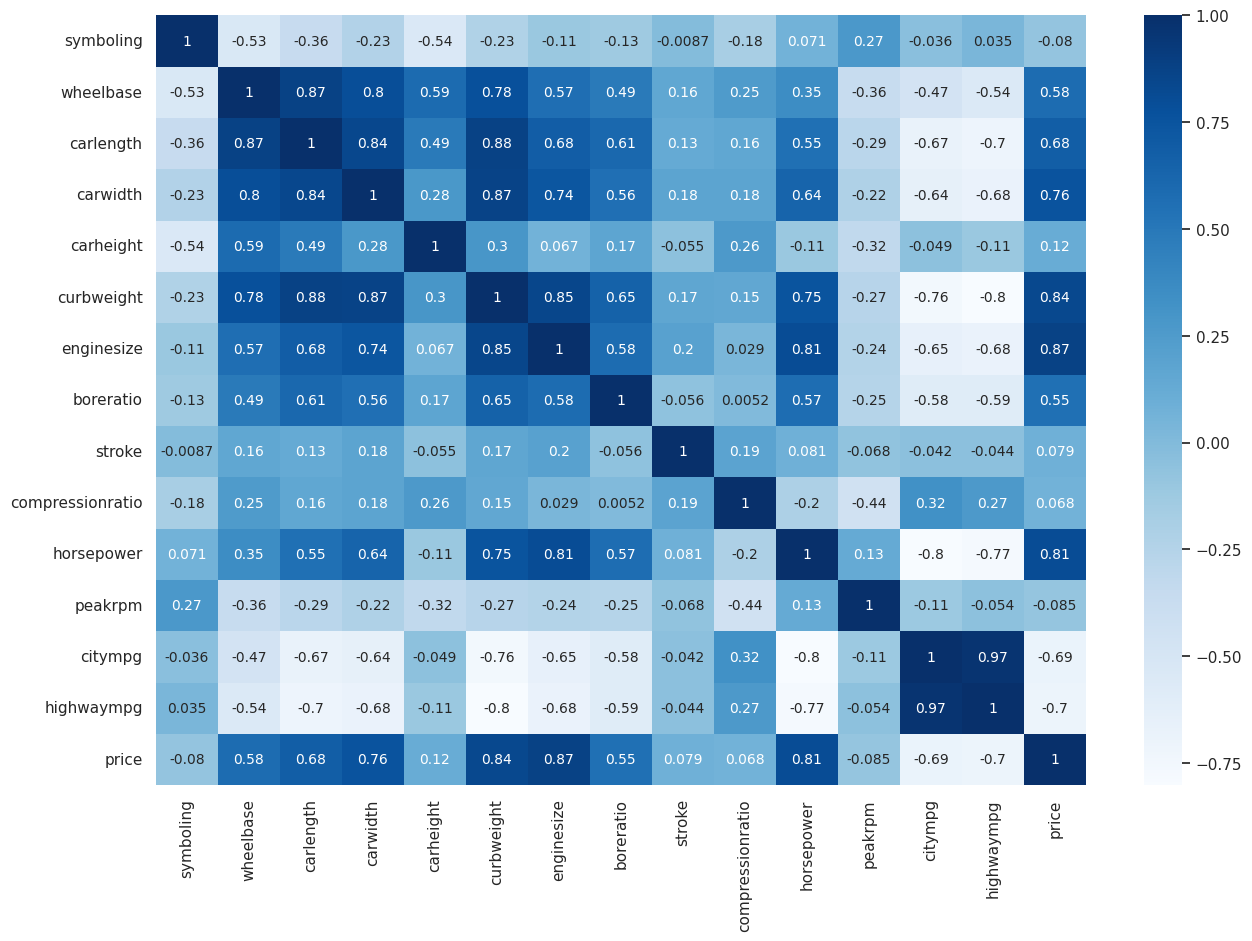

In [36]:
# Example 12 - Heatmap 

# droping columns we don't need
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [37]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible        bool
carbody_hardtop            bool
carbody_hatchback          bool
carbody_sedan              bool
carbody_wagon              bool
aspiration_std             bool
aspiration_turbo           bool
doornumber_four            bool
doornumber_two             bool
drivewheel_4wd             bool
drivewheel_fwd             bool
drivewheel_rwd             bool
enginelocation_front       bool
enginelocation_rear        bool
fuelsyst

In [38]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [39]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [40]:
dt.feature_importances_

array([0.067097, 0.008362, 0.106282, 0.057973, 0.039068, 0.110696,
       0.241150, 0.001786, 0.053168, 0.004961, 0.016314, 0.008851,
       0.094566, 0.014268, 0.014436, 0.048669, 0.000000, 0.005677,
       0.011418, 0.001297, 0.009659, 0.001297, 0.012283, 0.017902,
       0.006655, 0.000000, 0.009690, 0.003890, 0.003890, 0.000000,
       0.000000, 0.004934, 0.000000, 0.008393, 0.000000, 0.003083,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.009690,
       0.000000, 0.000000, 0.000000, 0.000000, 0.002594])

In [41]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.067
Importance of feature symboling:, 0.008
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.058
Importance of feature carwidth:, 0.039
Importance of feature carheight:, 0.111
Importance of feature curbweight:, 0.241
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.053
Importance of feature boreratio:, 0.005
Importance of feature stroke:, 0.016
Importance of feature compressionratio:, 0.009
Importance of feature horsepower:, 0.095
Importance of feature peakrpm:, 0.014
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.049
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.006
Importance of feature carbody_hatchback:, 0.011
Importance of feature carbody_sedan:, 0.001
Importance of feature carbody_wagon:, 0.010
Importance of feature aspiration_std:, 0.001
Importance of feature aspiration_turbo:, 0.012
Importance of feature doornumbe

,index,Variable,Feature Importance Score
0,6,curbweight,0.241150
1,5,carheight,0.110696
2,2,wheelbase,0.106282
3,12,horsepower,0.094566
4,0,car_ID,0.067097
5,3,carlength,0.057973
6,8,enginesize,0.053168
7,15,highwaympg,0.048669
8,4,carwidth,0.039068
9,23,doornumber_four,0.017902


## 6. Splitting the Raw Data - Hold-out validation

In [42]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(164, 47)
(41, 47)
(164,)
(41,)


In [43]:
# Training the Linear Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [44]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.939012854622914
The Accuracy r2  on the training dataset prediction is:  0.939012854622914

The Accuracy  on the testing dataset is:  0.8508618050906013

The RMSE  on the training dataset is:  1943.8483950356278
The RMSE  on the testing dataset is:  3224.5179693899845

The MAE  on the training dataset is:  1422.0261986002286
The MAE  on the testing dataset is:  2273.470675281548

Coefficients:  [-15.330950 310.151322 59.886408 -29.377917 546.770707 323.313594 5.310580
 -1430.395287 176.711113 -8126.107835 -5483.145262 -786.406633 13.581598
 2.554469 -10.337758 212.293090 3085.668953 -1977.929992 157.227140
 136.622407 -1401.588508 -633.439236 633.439236 170.495715 -170.495715
 -721.843059 -891.009633 1612.852691 -4227.250691 4227.250691 -1039.568450
 752.677402 650.137888 3709.099959 -2488.091529 1313.157971 -1376.357399
 -1521.055842 -2566.560595 3601.273250 -3836.289677 972.667940 2115.205993
 -5921.093144 5634.796234 3709.099959 -3709.099

In [45]:
new_raw_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
3,4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True


In [46]:
#Trying Regressing with less variables
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'horsepower', 'car_ID',
       'carlength', 'enginesize', 'highwaympg', 'carwidth',
       'doornumber_four'], dtype=object)

In [47]:
# Split the data into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8958963506004924
The RMSE  on the testing dataset is:  2694.0356437823834
The MAE  on the testing dataset is:  1987.0584138537763


In [48]:
# with Linear Regression
# Trying the recursive feature elimination process

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [49]:
rfe_lr

Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')

In [51]:
# Split the data into X & y

test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201712
The RMSE  on the testing dataset is:  3516.6528965468383
The MAE  on the testing dataset is:  2410.404746075232


In [52]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [53]:
# Split the data into X & y

test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8962481519089992
The RMSE  on the testing dataset is:  2689.47976447147
The MAE  on the testing dataset is:  2045.511919267476


Trying Other Models :
Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

The Accuracy  on the testing dataset is:  0.87857909726018
The RMSE  on the testing dataset is:  2909.4914752165437
The MAE  on the testing dataset is:  2121.1311847103157


In [55]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [56]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [57]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))


The Accuracy  on the testing dataset is:  0.8791273338526945
The RMSE  on the testing dataset is:  2902.9156128245904
The MAE  on the testing dataset is:  1662.0524670474829


## 11.2. XG Boost Regressor

In [58]:

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [59]:
# optimizing XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
# grid search doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}


In [60]:
clf.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 1000}

In [61]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))


The Accuracy  on the testing dataset is:  0.9433426260948181
The RMSE  on the testing dataset is:  1987.4611691397392
The MAE  on the testing dataset is:  1286.9130859375


## 11.3. Neural Network Regressor - MLPRegressor

In [62]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

The Accuracy  on the testing dataset is:  0.5674057750666428
The RMSE  on the testing dataset is:  5491.749498234063
The MAE  on the testing dataset is:  3636.640750707685


/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
# Optimising MLPR

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

regr = MLPRegressor(random_state=1, max_iter=500)

clf = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Best parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
# Training the model on best parameters

regr = MLPRegressor(random_state=1, max_iter=500, activation='relu', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')
regr.fit(X_train, y_train)


y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.3150811004773866
The RMSE  on the testing dataset is:  6910.189151970831
The MAE  on the testing dataset is:  4912.798081893555


/home/balendran/stockprice_prediction/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusions: XGBooster Regressor without optimization did the best job!

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y

#del new_raw_data['Price_Predictions']

X = new_raw_data.drop(['price', 'carname'], axis = 1).values
X_columns = new_raw_data.drop(['price', 'carname'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

KeyError: "['carname'] not found in axis"

In [67]:
X_train.shape

(164, 47)

In [68]:
y_pred.shape

(164,)

/tmp/ipykernel_1059/1073521889.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

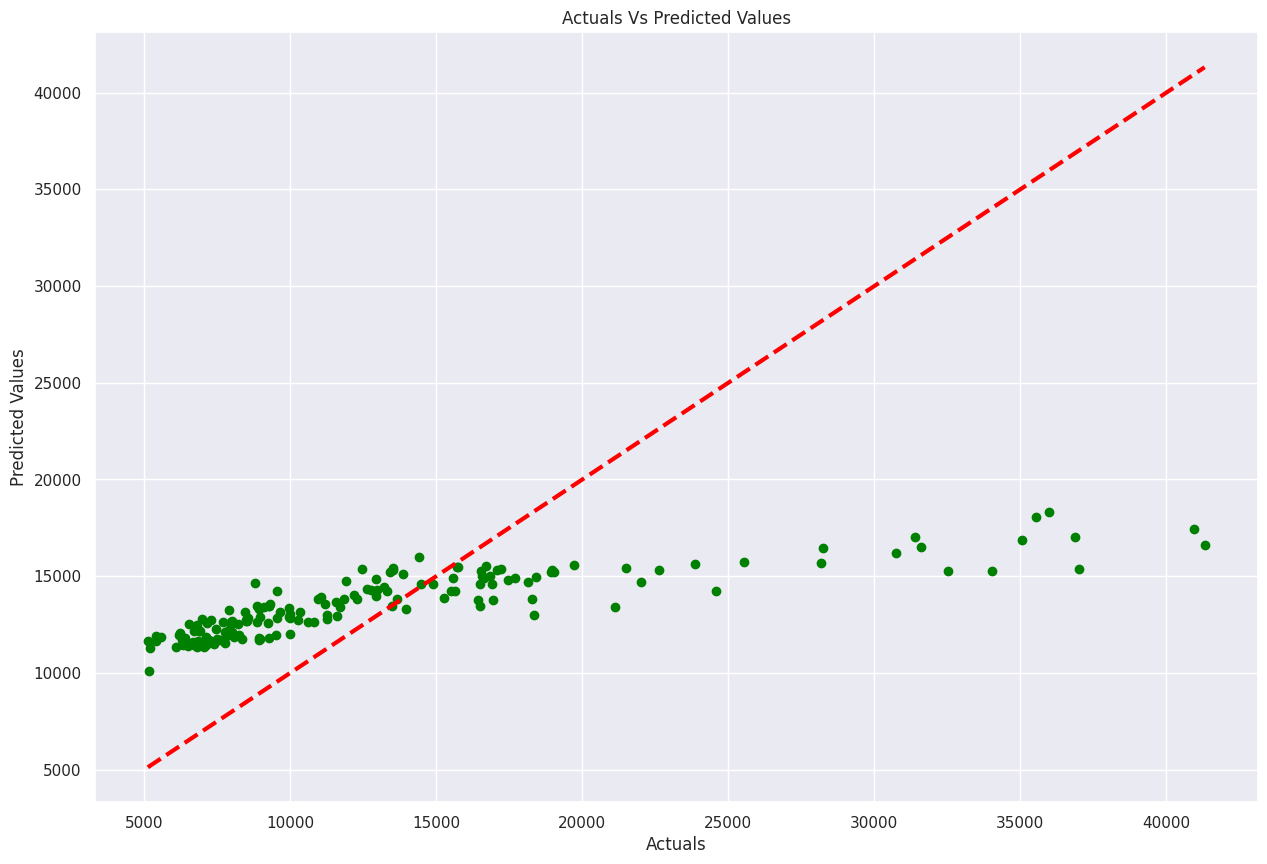

In [69]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

In [70]:
X_train

array([[50, 0, 102.0, ..., False, False, True],
       [189, 2, 97.3, ..., False, False, True],
       [143, 0, 97.2, ..., False, False, True],
       ...,
       [134, 2, 99.1, ..., False, False, True],
       [141, 2, 93.3, ..., False, False, True],
       [201, -1, 109.1, ..., False, False, True]], dtype=object)

In [71]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price_Predictions'] = y_pred
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price_Predictions'] = reg.predict(X_test)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)



(164, 50)
(41, 50)
(205, 50)


## 12. Joining the original dataset with the predictions

In [72]:

# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price_Predictions'] = y_pred
print(final_df.shape)

# Fixing the test df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price_Predictions'] = reg.predict(X_test)
print(final_df2.shape)

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price_Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Phase,Price_Predictions
0,1,3,alfa-romero giulia - 1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Existing data,13451.715238
1,2,3,alfa-romero stelvio - 2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Existing data,13451.117907
2,3,1,alfa-romero Quadrifoglio - 3,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,New unseen data,16644.131234
3,4,2,audi 100 ls - 4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Existing data,13289.727329
4,5,2,audi 100ls - 5,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Existing data,14823.129764


In [48]:
# Exporting the DataFrame to a CSV file
final_df4.to_csv('Car_Predictions_Output_File.csv', index=False)

# Get the current working directory to check where the file was saved
os.getcwd()

'/home/balendran/stockprice_prediction'

In [187]:
from pyspark.sql import SparkSession

# Assuming you already have a Spark session
spark = SparkSession.builder \
    .appName("DataFrameToCassandra") \
    .config("spark.cassandra.connection.host", "127.0.0.1") \
    .getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(final_df4)


In [206]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("DataFrameToCassandra") \
    .config("spark.cassandra.connection.host", "127.0.0.1") \
    .config("spark.cassandra.connection.port", "9042") \
    .getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(final_df4)

# Write the Spark DataFrame to Cassandra
spark_df.write \
    .format("org.apache.spark.sql.cassandra") \
    .options(table="car_predictions_output", keyspace="cardata") \
    .mode("append") \
    .save()


24/08/16 10:51:08 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Py4JJavaError: An error occurred while calling o374.save.
: org.apache.spark.SparkClassNotFoundException: [DATA_SOURCE_NOT_FOUND] Failed to find the data source: org.apache.spark.sql.cassandra. Please find packages at `https://spark.apache.org/third-party-projects.html`.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.dataSourceNotFoundError(QueryExecutionErrors.scala:738)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:647)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:697)
	at org.apache.spark.sql.DataFrameWriter.lookupV2Provider(DataFrameWriter.scala:860)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:256)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:247)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.ClassNotFoundException: org.apache.spark.sql.cassandra.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:594)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:527)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:633)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:633)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:633)
	... 16 more


Traceback (most recent call last):
  File "cassandra/cluster.py", line 3577, in cassandra.cluster.ControlConnection._reconnect_internal
  File "cassandra/cluster.py", line 3654, in cassandra.cluster.ControlConnection._try_connect
  File "cassandra/cluster.py", line 3651, in cassandra.cluster.ControlConnection._try_connect
  File "cassandra/cluster.py", line 3753, in cassandra.cluster.ControlConnection._refresh_schema
  File "cassandra/metadata.py", line 140, in cassandra.metadata.Metadata.refresh
  File "cassandra/metadata.py", line 163, in cassandra.metadata.Metadata._rebuild_all
  File "cassandra/metadata.py", line 2868, in get_all_keyspaces
  File "cassandra/metadata.py", line 2518, in get_all_keyspaces
  File "cassandra/metadata.py", line 2027, in get_all_keyspaces
  File "cassandra/metadata.py", line 2807, in cassandra.metadata.SchemaParserV4._query_all
  File "cassandra/connection.py", line 1126, in cassandra.connection.Connection.wait_for_responses
  File "cassandra/connection.p